In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [127]:
data = pd.read_csv("Davidson_Crashes_2019_.csv")
df = pd.DataFrame(data) 
df['Date and Time'] = pd.to_datetime(df['Date and Time'])
df.dtypes

Accident Number                       object
Date and Time                 datetime64[ns]
Number of Motor Vehicles             float64
Number of Injuries                   float64
Number of Fatalities                 float64
Property Damage                       object
Hit and Run                           object
Reporting Officer                     object
Collision Type Code                  float64
Collision Type Description            object
Weather Code                         float64
Weather Description                   object
Illumination Code                    float64
Illumination Description              object
Harmful Code                          object
Harmful Code Description              object
Street Address                        object
City                                  object
State                                 object
ZIP                                   object
RPA                                  float64
Precinct                              object
Latitude  

In [128]:
#setup deer cols
deer_setup_cols = df.drop(['Number of Motor Vehicles',
       'Number of Injuries', 'Number of Fatalities', 'Property Damage',
       'Hit and Run', 'Reporting Officer', 'Collision Type Code',
       'Collision Type Description', 'Weather Code', 'Weather Description',
       'Illumination Code', 'Illumination Description','Street Address', 'City', 'State', 'ZIP',
       'RPA', 'Precinct', 'Latitude', 'Longitude', 'Mapped Location'], axis=1)
len(deer_setup_cols)

284851

In [129]:
#remove NaN
no_empty_rows = deer_setup_cols.dropna()
len(no_empty_rows)

283159

In [130]:
#convert to DF
no_empty_df = pd.DataFrame(no_empty_rows)
no_empty_df.head()

,Accident Number,Date and Time,Harmful Code,Harmful Code Description
0,20190004211,2019-01-02 15:58:00,12,MOTOR VEHICLE IN TRANSPORT
1,20190025356,2019-01-10 15:37:00,12,MOTOR VEHICLE IN TRANSPORT
2,20190096838,2019-02-05 12:30:00,12,MOTOR VEHICLE IN TRANSPORT
3,20190112437,2019-02-11 09:53:00,12,MOTOR VEHICLE IN TRANSPORT
4,20190129966,2019-02-17 11:06:00,12,MOTOR VEHICLE IN TRANSPORT


In [131]:
#get deer data
deer_df = no_empty_df[(no_empty_df['Harmful Code'].str.contains("50", na=False))]
len(deer_df)

2366

In [132]:
#sort by time asc
deer_time = deer_df.rename(columns={'Date and Time':'Time'})
deer_timed = deer_time.sort_values(by = 'Time', ascending=True)
deer_timed.head()

,Accident Number,Time,Harmful Code,Harmful Code Description
23454,2009989685,2009-11-06 20:20:00,50,DEER (ANIMAL)
23016,2009939328,2009-11-19 00:15:00,50,DEER (ANIMAL)
23029,2009965245,2009-11-29 01:40:00,50,DEER (ANIMAL)
23103,2009972133,2009-12-01 17:00:00,50,DEER (ANIMAL)
23211,2009974924,2009-12-02 19:18:00,50,DEER (ANIMAL)


In [133]:
##filter 2009 and 2019 data without lat/long
start_date = '2010-01-01'
end_date = '2019-05-26'
mask = (deer_timed['Time'] > start_date) & (deer_timed['Time'] <= end_date)
deer_no09 = deer_timed.loc[mask]
len(deer_no09)

2306

In [134]:
daily_deer = deer_no09.Time.dt.weekday_name
hourly_deer = deer_no09.Time.dt.hour
monthly_deer = deer_no09.Time.dt.month
yearly_deer = deer_no09.Time.dt.year
len(hourly_deer)

2306

In [135]:
hourly_arr = [hourly_deer]

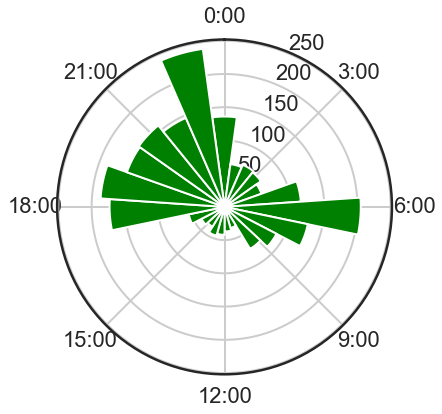

In [161]:
N = 23
bottom = 2

# create theta for 24 hours
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

# make the histogram that bined on 24 hour
radii, tick = np.histogram(hourly_arr, bins = 23)

# width of each bin on the plot
width = (2*np.pi) / N

# make a polar plot
plt.figure(figsize = (6, 13))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom, color='green')

# set the lable go clockwise and start from the top
ax.set_theta_zero_location("N")
# clockwise
ax.set_theta_direction(-1)

# set the label
ticks = ['0:00', '3:00', '6:00', '9:00', '12:00', '15:00', '18:00', '21:00']
ax.set_xticklabels(ticks)

plt.show()
#plt.savefig('deer_rose.pdf')